In [1]:
# %matplotlib inline
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import os;
%reload_ext autoreload
%autoreload 2


TARGET='Depression'

"""
Column Names
,id,
Name,
Gender,
Age,
City,
Working Professional or Student,
Profession,
Academic Pressure,
Work Pressure,
CGPA,
Study Satisfaction,
Job Satisfaction,
Sleep Duration,
Dietary Habits,
Degree,
Have you ever had suicidal thoughts ?,
Work/Study Hours,
Financial Stress,
Family History of Mental Illness,
Depression

"""

allowed_cols = [
        'id',
        # 'Name',
        'Gender', # Cleaned
        'Age', # Cleand
        'City', #Cleaned
        'Working Professional or Student', # Clean data
        'Profession', # Minor erros need not fix as statistically numbers are not great
        'Academic Pressure', # Data is clean
        'Work Pressure', # Data is clean
        'CGPA', # Cleaned
        'Study Satisfaction', #data is clean
        'Job Satisfaction', #data is clean
        'Sleep Duration', # Cleaned
        'Dietary Habits', # minor issues not statistically relevant
        'Degree',# minor issues not statistically relevant
        'Have you ever had suicidal thoughts ?', # Data  is clean
        'Work/Study Hours', # Clean
        'Financial Stress', # clean
        'Family History of Mental Illness', #Clean
        'Depression',
    ]


def list_files(directory):
    absolute_paths = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            absolute_paths.append(os.path.abspath(filepath))
    return absolute_paths
# print(f)

train_list = list_files('../data/processed/')

df_list = []
for f in train_list:
    if not('train' in f):
        continue

    d = pd.read_csv(f,
        usecols=allowed_cols,  
        dtype={   
        'Depression': str ,
        'CGPA': str,
        'Sleep Duration':str
    })

    df_list.append(d)
        # Combine the list of dataframes
df = pd.concat(df_list, ignore_index=True)

print("total rows",len(df)) 

column_names = df.keys().to_list()
column_names.remove('id')

def slugify(s):
    s = s.lower().strip()
    s = re.sub(r'[^A-Za-z0-9]+', '-', string=s)
    return s



total rows 125000


In [2]:

# Print the count of each distinct value in each column



for column in column_names:
    
    slug = slugify(column); 
    print(f"Counts for column '{column}':")
    stats = df[column].value_counts(sort=False);
    stats.sort_index()
    print(stats)
    print("\n")
    # break


Counts for column 'Gender':
Gender
Male      68848
Female    56152
Name: count, dtype: int64


Counts for column 'Age':
Age
35.0    2541
40.0    2742
39.0    2911
20.0    3120
30.0    1685
21.0    2455
41.0    2767
47.0    3754
33.0    2742
19.0    2350
34.0    2311
59.0    3350
28.0    2974
18.0    3483
23.0    2573
45.0    3129
36.0    2414
32.0    1578
24.0    3011
44.0    2872
53.0    4012
48.0    3280
58.0    2612
57.0    3926
54.0    3480
25.0    2612
38.0    4052
27.0    2296
37.0    2400
26.0    1881
46.0    3625
29.0    2782
42.0    3019
56.0    4641
55.0    2501
60.0    2239
51.0    3465
49.0    4506
52.0    2295
43.0    3453
22.0    1843
50.0    3044
31.0    2274
Name: count, dtype: int64


Counts for column 'City':
City
Visakhapatnam    4617
Surat            4110
Hyderabad        3965
Rajkot           4626
Faridabad        2888
Ahmedabad        4969
Kolkata          5022
Mumbai           4419
Bangalore        3650
Ludhiana         4650
Delhi            3178
Srinagar        

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     125000 non-null  int64  
 1   Gender                                 125000 non-null  object 
 2   Age                                    125000 non-null  float64
 3   City                                   125000 non-null  object 
 4   Working Professional or Student        125000 non-null  object 
 5   Profession                             125000 non-null  object 
 6   Academic Pressure                      24813 non-null   float64
 7   Work Pressure                          100170 non-null  float64
 8   CGPA                                   125000 non-null  object 
 9   Study Satisfaction                     24812 non-null   float64
 10  Job Satisfaction                       100175 non-null  

Gender for Female     has   17.71%     9950,    56152
Gender for Male       has   18.44%    12701,    68848
Generated ../reports/figures/gender.png chart
Age for       18.0 has   70.42%     2453,     3483
Age for       19.0 has    62.8%     1476,     2350
Age for       20.0 has    62.3%     1944,     3120
Age for       21.0 has   67.33%     1653,     2455
Age for       22.0 has   52.14%      961,     1843
Age for       23.0 has   55.57%     1430,     2573
Age for       24.0 has   55.69%     1677,     3011
Age for       25.0 has   53.67%     1402,     2612
Age for       26.0 has   41.78%      786,     1881
Age for       27.0 has   51.65%     1186,     2296
Age for       28.0 has   52.62%     1565,     2974
Age for       29.0 has   46.08%     1282,     2782
Age for       30.0 has   32.22%      543,     1685
Age for       31.0 has   38.61%      878,     2274
Age for       32.0 has   42.45%      670,     1578
Age for       33.0 has   29.72%      815,     2742
Age for       34.0 has   19.55

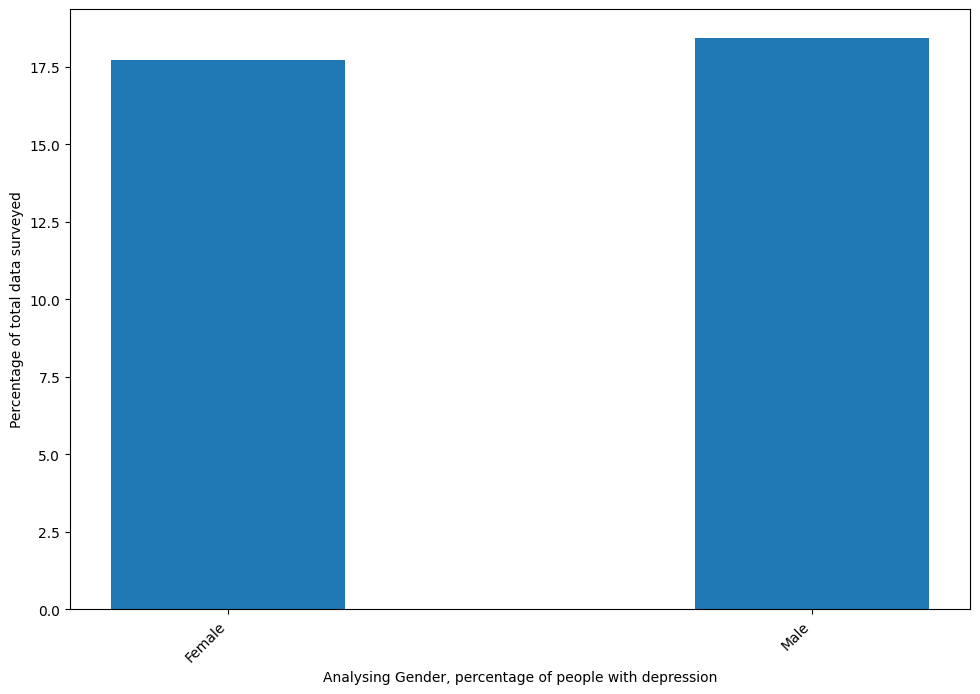

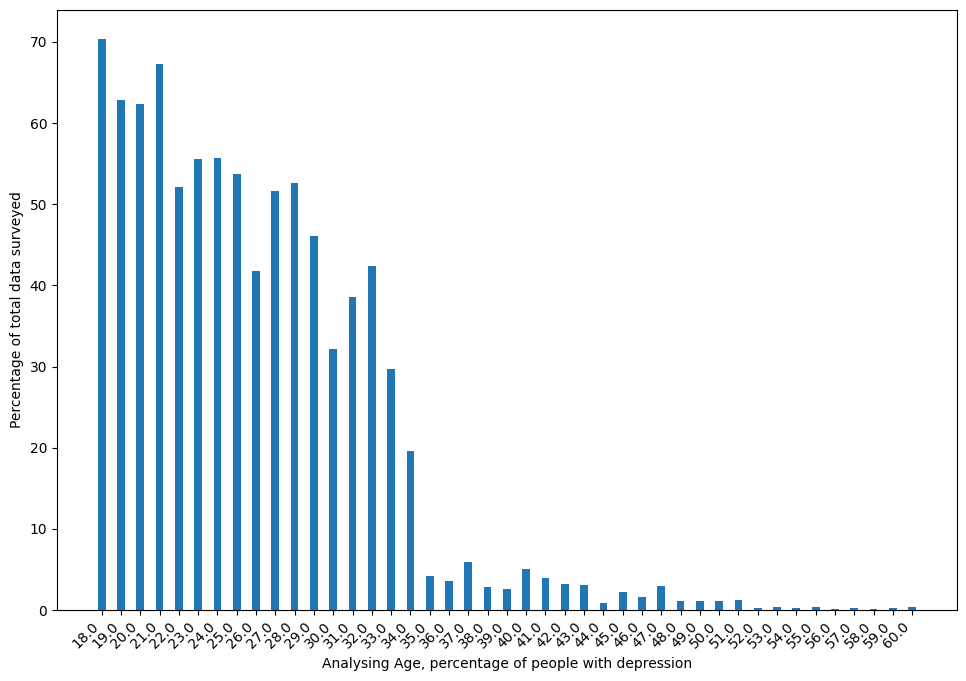

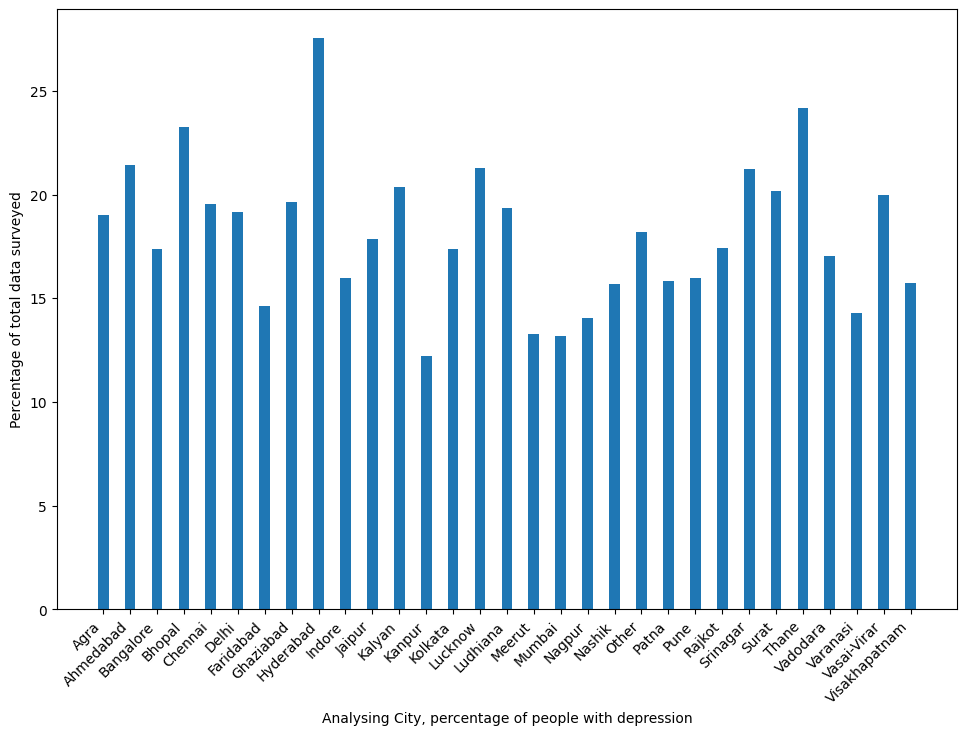

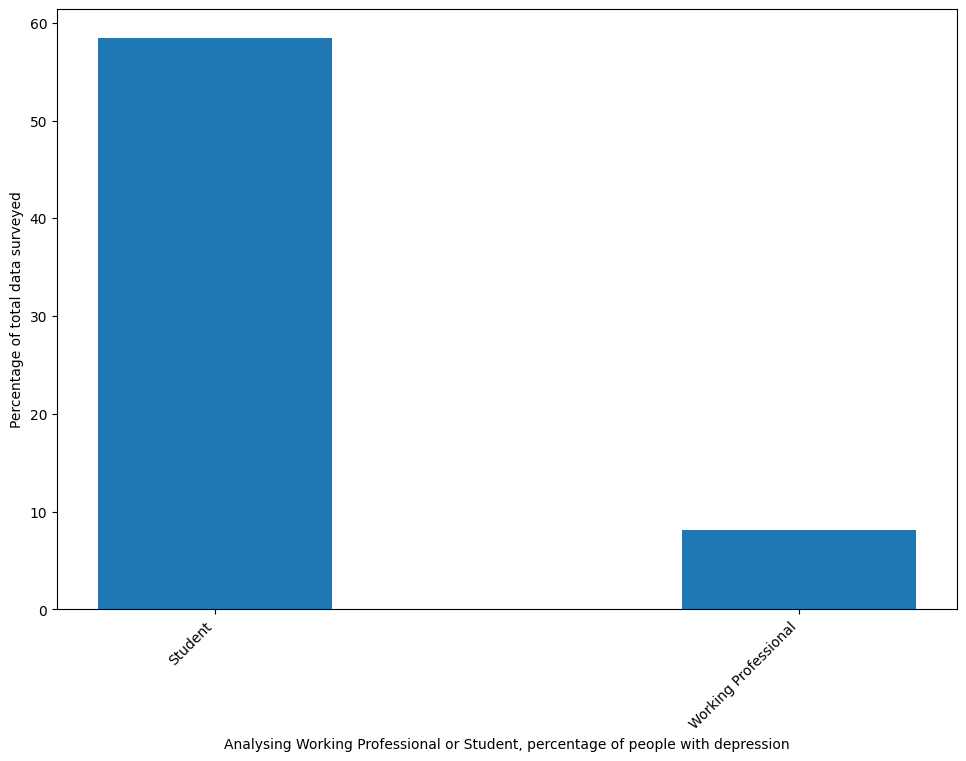

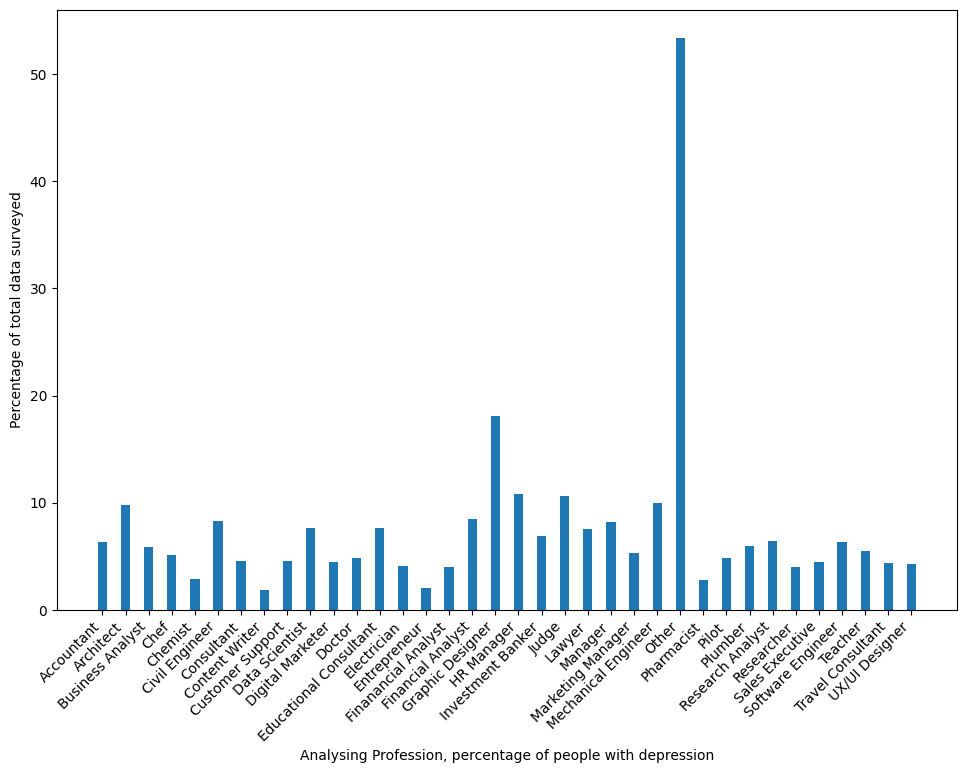

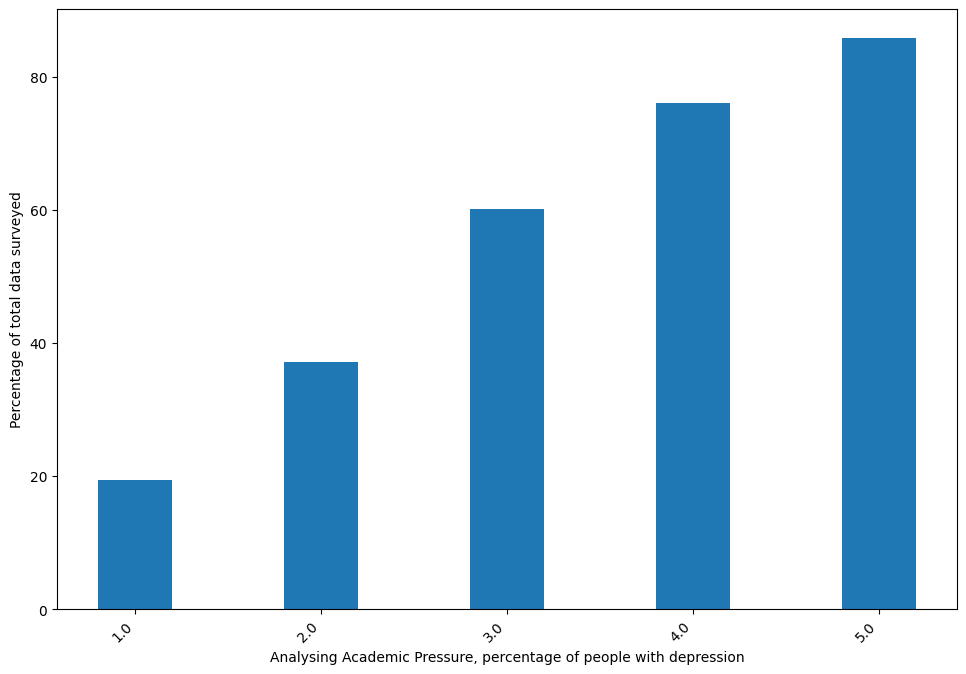

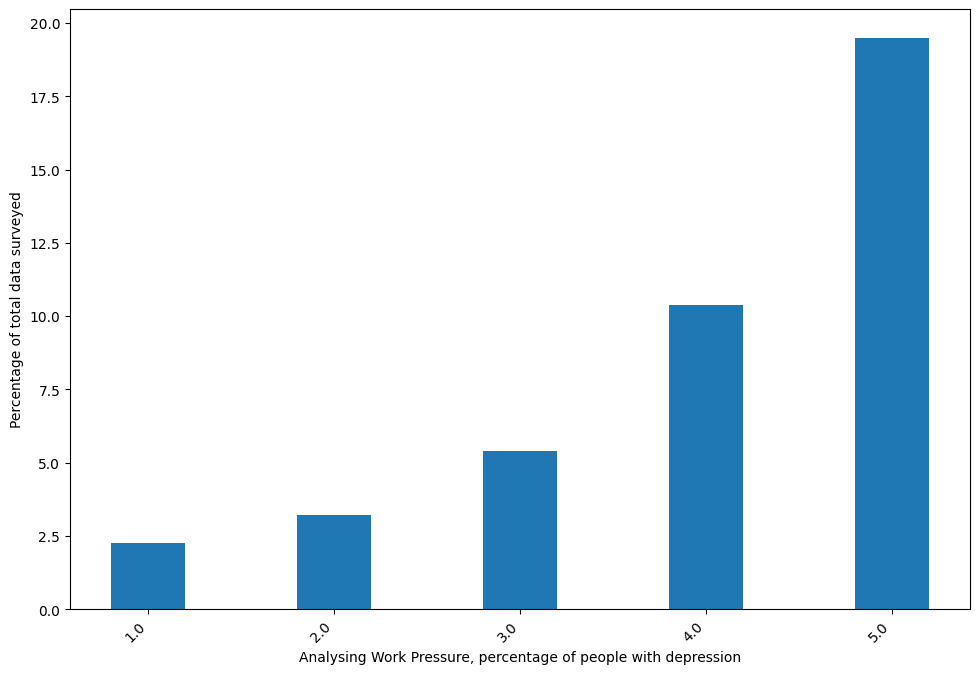

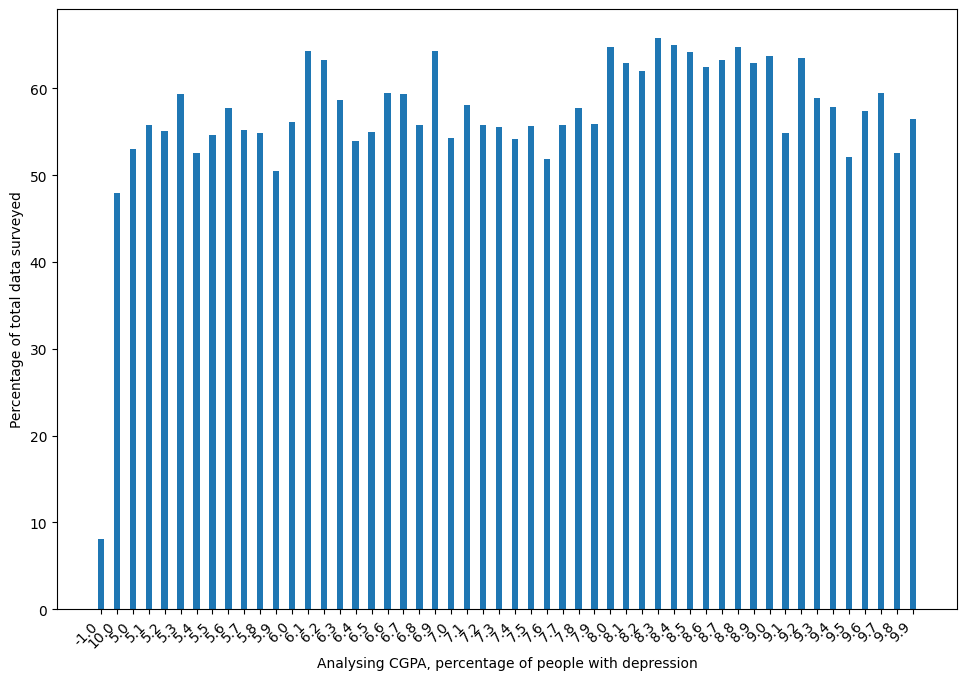

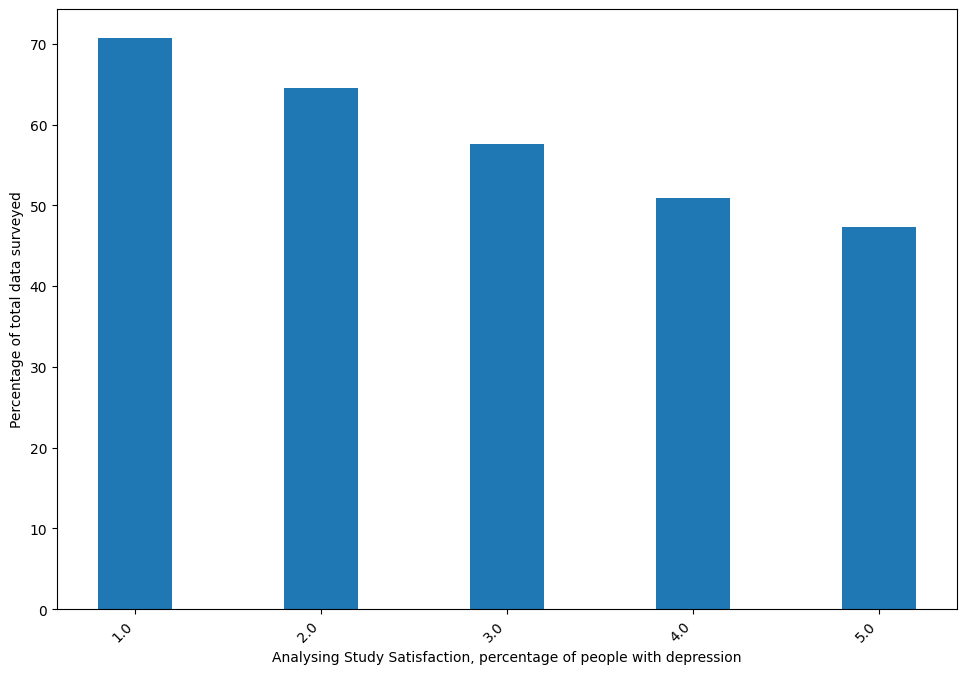

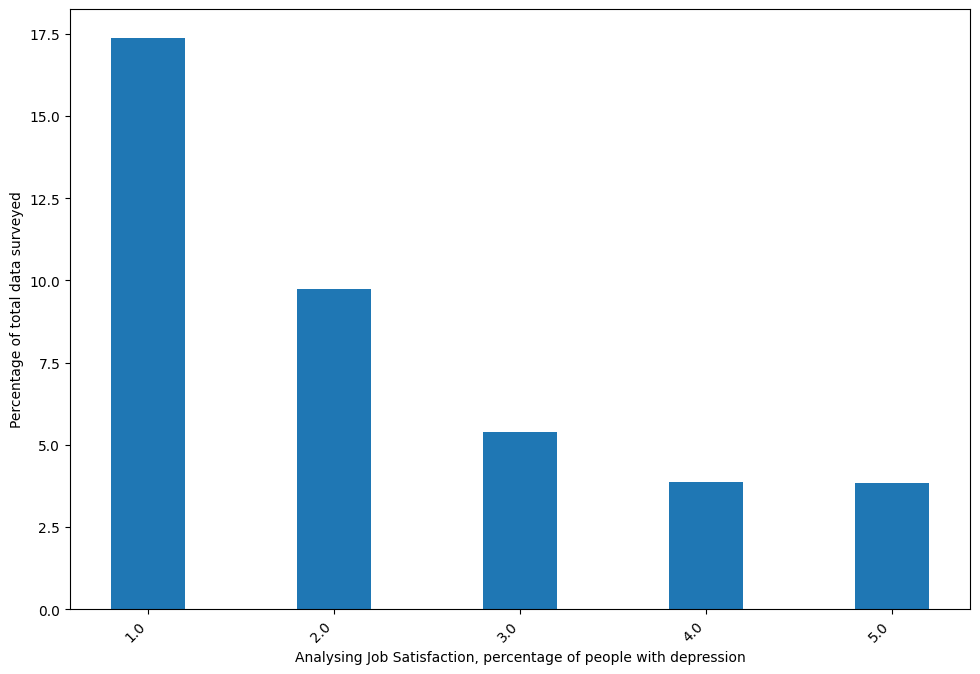

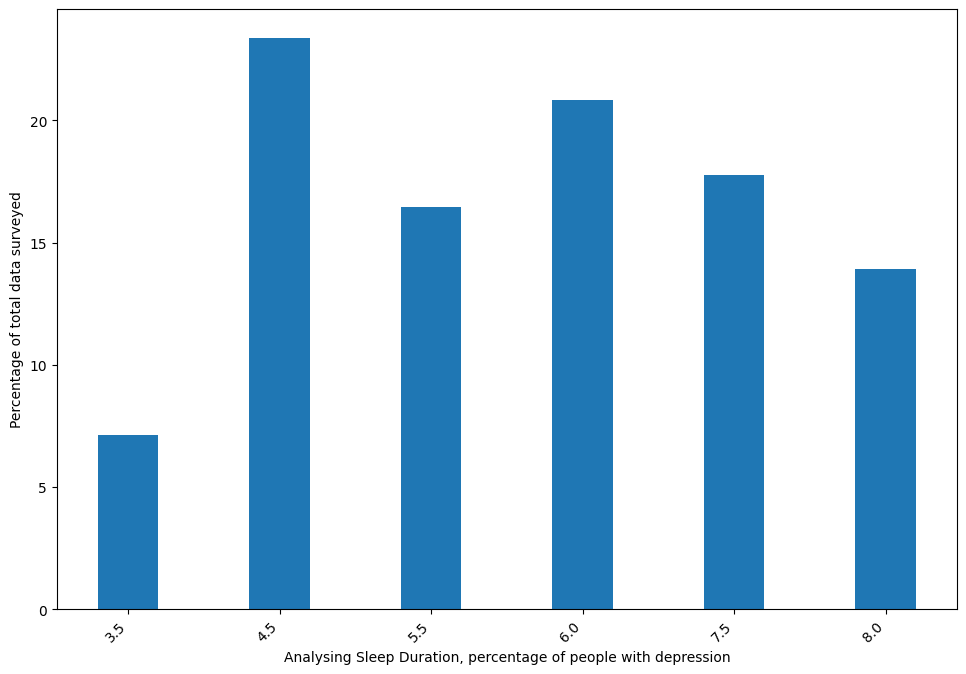

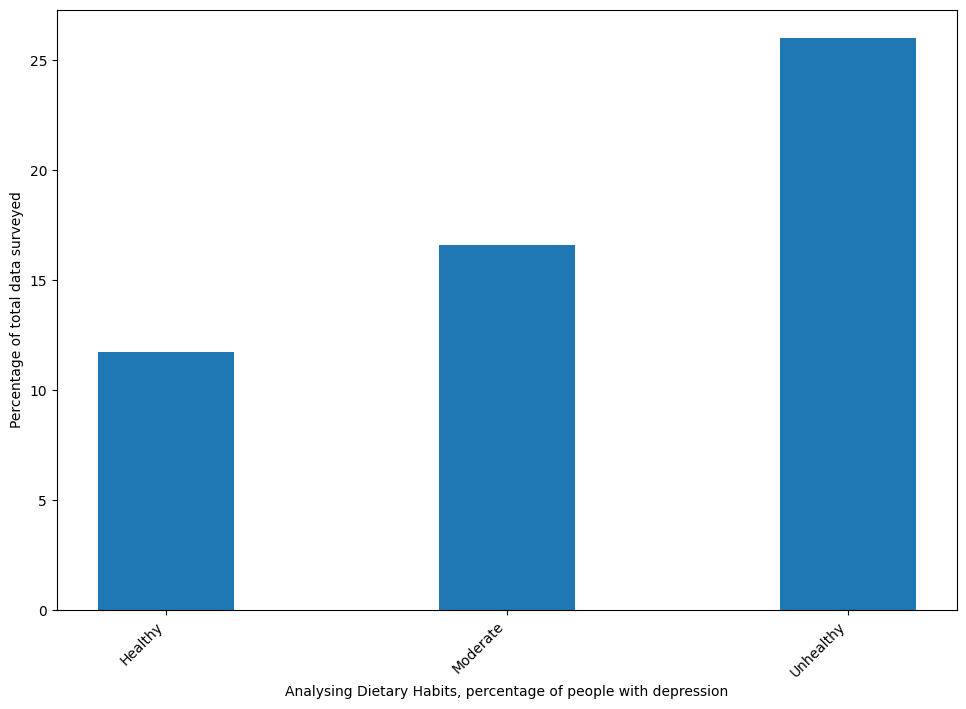

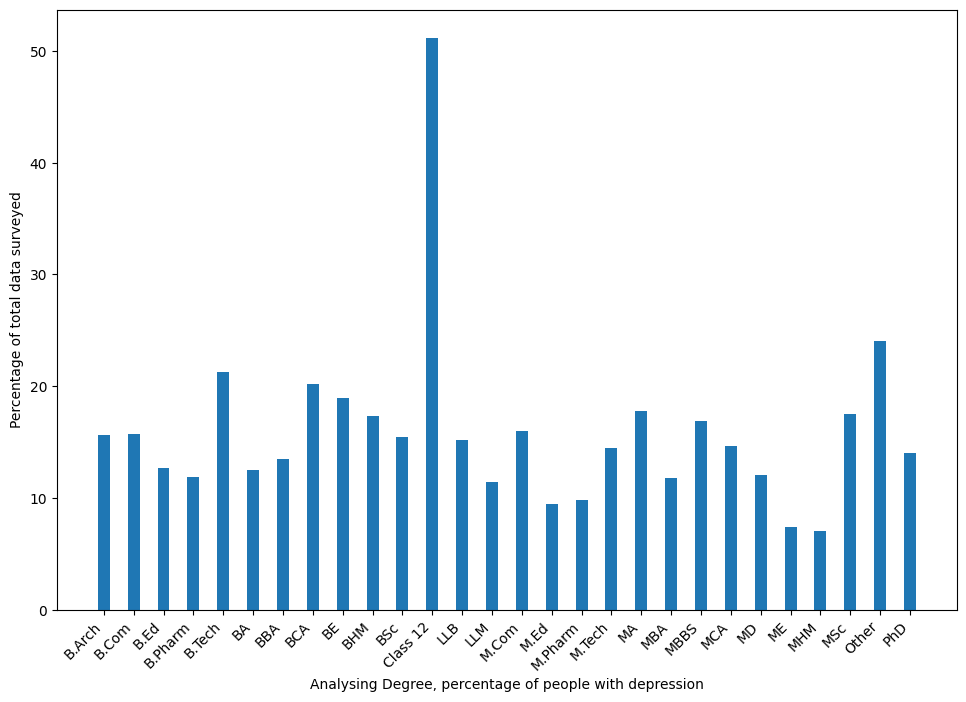

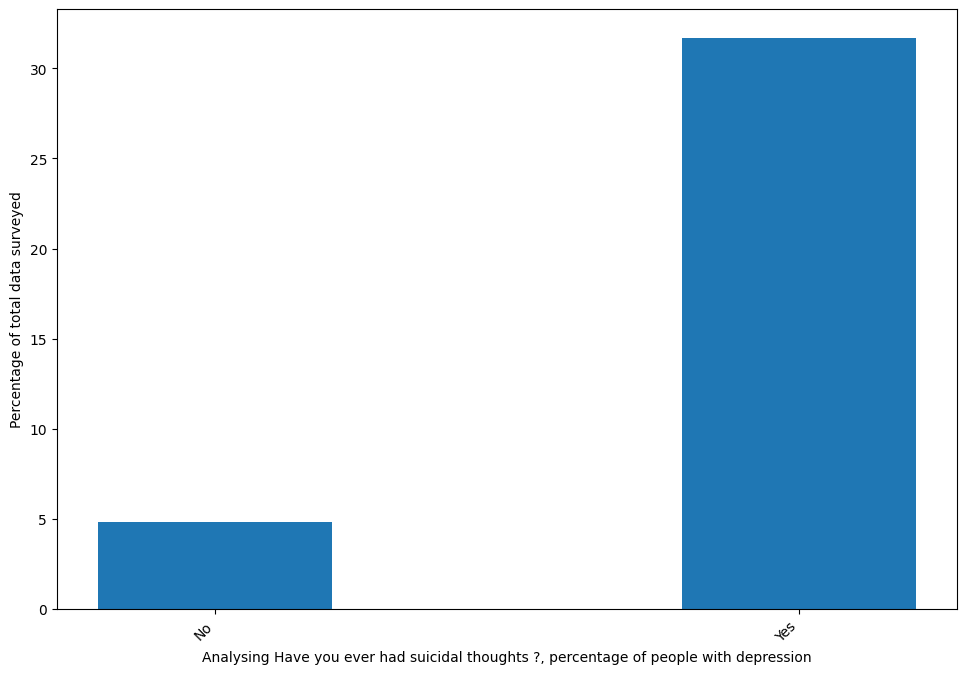

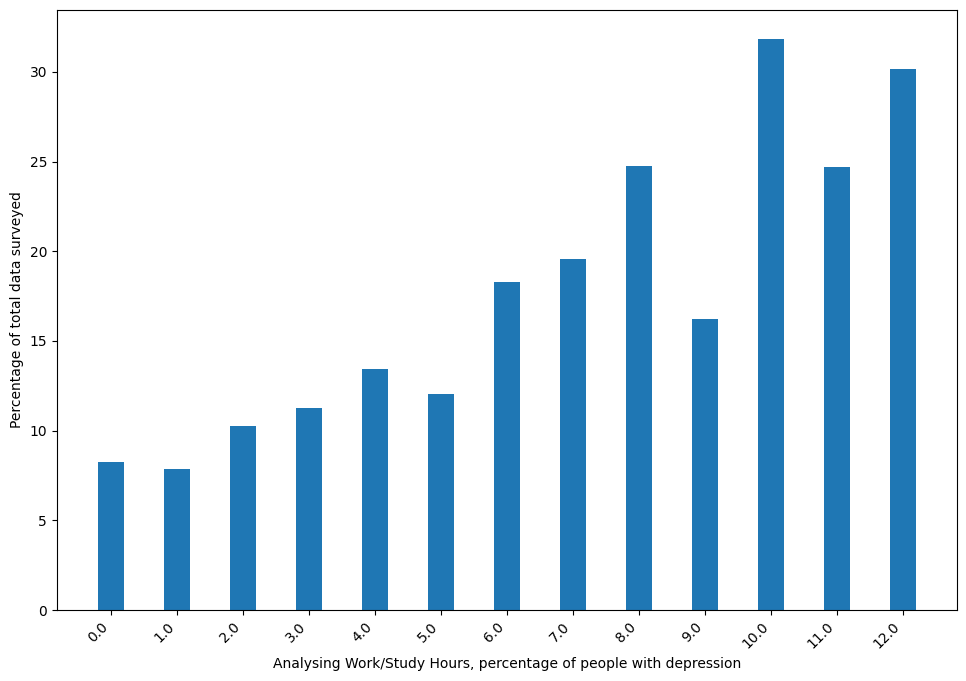

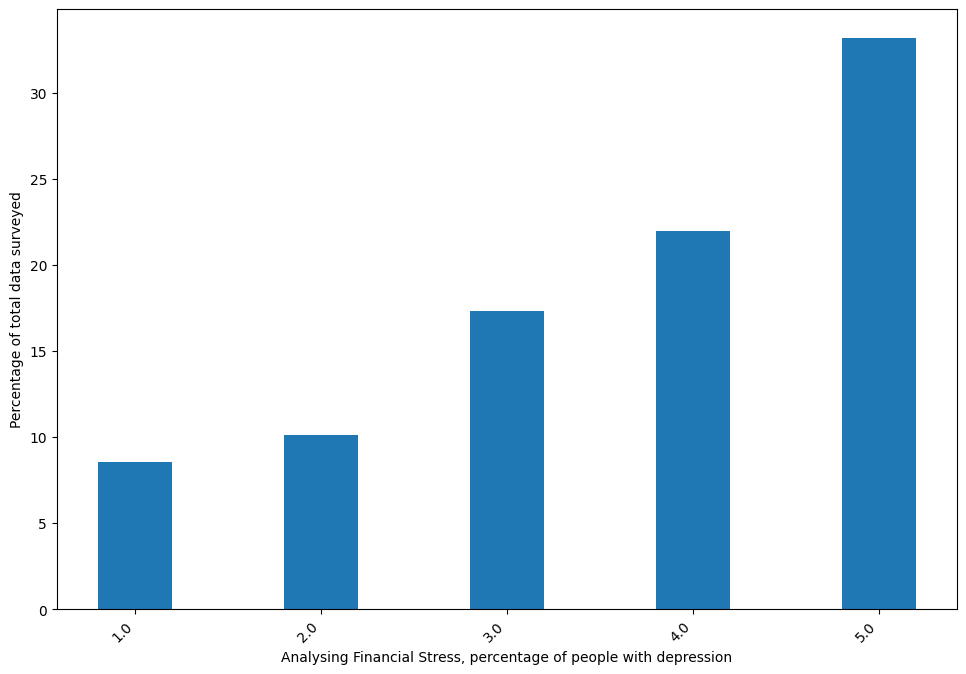

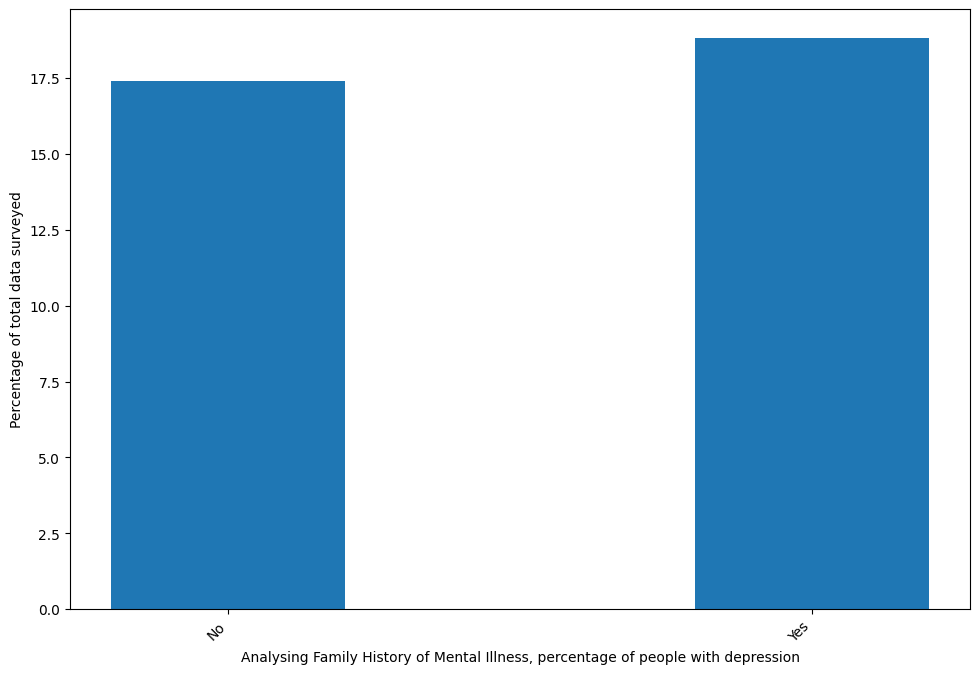

In [28]:

all_keys =  df.keys().to_list()

all_keys.remove('id')
all_keys.remove(TARGET)
# result['Gender']
# print(all_keys, result)


 

for key in all_keys:

    try :
            # result = df.groupby([key,TARGET]).value_count()
            figure = plt.figure(figsize=(10,8))
            axes = figure.add_axes([0.1,0.2,0.9, 0.75])
             
            axes.set_ylabel('Percentage of total data surveyed')
            axes.set_xlabel(f"Analysing {key}, percentage of people with depression")

            grouped_counts = df.groupby([key, TARGET])[TARGET].value_counts()
            df2 = grouped_counts.reset_index(name='Count')
            # print(df2)
            uq_list = df2[key].unique()
            # print(uq_list)
            names = []
            vals = []
            data_list = []
            for name in uq_list : 
               total = df2.loc[df2[key] == name, 'Count'].sum()
               if total < 10:
                    continue
               depressed = df2.loc[(df2[key] == name ) & (df2['Depression'] == "1"), 'Count'].sum() 
               names.append(name) 
            
               perc =math.floor(depressed*10000/total)/100
               vals.append(perc)    
               data_list.append([name,perc,depressed,total])
               print(f"{key} for {name:10} has  {perc:>6}% {depressed:>8}, {total:>8}")
            # axes.plot(names,vals,)
            axes.bar(names, vals,0.4)
            axes.set_xticks(names)
            axes.set_xticklabels(names, rotation=45, ha='right')
            target = f'../reports/figures/{slugify(key)}.png'
            figure.savefig(target)
            print(f"Generated {target} chart")


            stats = pd.DataFrame(np.array(data_list),columns=[key,'Percentage','Depressed','Total'])
             
            # print(stats)
            stats.to_csv(f"../reports/{slugify(key)}.csv")

    except Exception as err:
        print("Error while",err)
    # break


    # plt.bar(depression_counts['Age'], depression_counts['Count'], color='skyblue')
 